# Description

- Client want's to start investing in the stock market but, first of all he wants to test the waters by taking the help of machine learning to help him with the decision making whether to buy the stocks on the given day or not.
- He want's to know if the market will rise or collapse on the given day to maximize his profits and reduce the losses.
- The dataset is obtained from the official NSE India website.
- The dataset has attributes like Dates, Open, High, Low, Close related to the nifty 50 index for a particular day.
- The task is to Forecast the highest value of Nifty 50 index of the next day.
- It's a "Time Series Forecasting Problem".

In [1]:
# !pip install keras

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Importing the data
df = pd.read_csv('/content/gdrive/MyDrive/Board Infinity/ML/Stock Market Forecasting Project/Nifty 50 2011-20.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,0,03-Jan-2011,6177.45,6178.55,6147.20,6157.60,96028639,4477.36
1,1,04-Jan-2011,6172.75,6181.05,6124.40,6146.35,181727905,7678.55
2,2,05-Jan-2011,6141.35,6141.35,6062.35,6079.80,139614193,6606.21
3,3,06-Jan-2011,6107.00,6116.15,6022.30,6048.25,152338978,7050.18
4,4,07-Jan-2011,6030.90,6051.20,5883.60,5904.60,171809106,8325.79


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2457 non-null   int64  
 1   Date               2457 non-null   object 
 2   Open               2457 non-null   float64
 3   High               2457 non-null   float64
 4   Low                2457 non-null   float64
 5   Close              2457 non-null   float64
 6   Shares Traded      2457 non-null   int64  
 7   Turnover (Rs. Cr)  2457 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 153.7+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2457 non-null   int64         
 1   Date               2457 non-null   datetime64[ns]
 2   Open               2457 non-null   float64       
 3   High               2457 non-null   float64       
 4   Low                2457 non-null   float64       
 5   Close              2457 non-null   float64       
 6   Shares Traded      2457 non-null   int64         
 7   Turnover (Rs. Cr)  2457 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 153.7 KB


In [8]:
# Create a new dataframe with only high column

ts = df[['Date','High']]
ts.set_index('Date', inplace = True)
ts.head()

,High
Date,
2011-01-03,6178.55
2011-01-04,6181.05
2011-01-05,6141.35
2011-01-06,6116.15
2011-01-07,6051.20


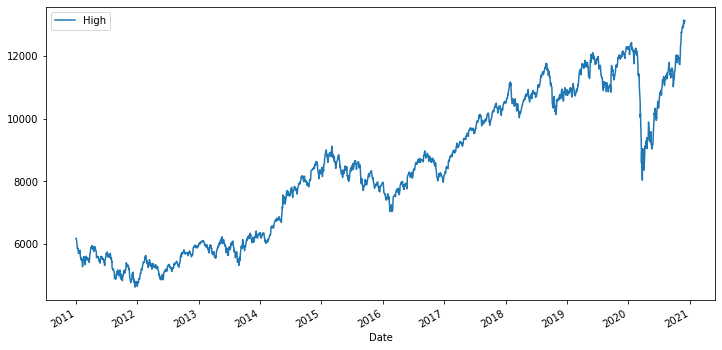

In [9]:
ts.plot(figsize = (12,6), kind= 'line')

In [10]:
# Get the amount of data to be trained
training_data_len = math.ceil(len(ts)*0.7)
training_data_len

1720

In [11]:
# Scaling the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(ts)
scaled_data[:10]

array([[0.18250085],
       [0.18279418],
       [0.17813604],
       [0.17517923],
       [0.1675584 ],
       [0.15066822],
       [0.14308259],
       [0.14679034],
       [0.1448602 ],
       [0.14203245]])

In [12]:
# Create a scaled training dataset
train_data = scaled_data[0:training_data_len,:]

# Split the data into x_train(Independent variables) and y_train(dependent variable) datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.18250085, 0.18279418, 0.17813604, 0.17517923, 0.1675584 ,
       0.15066822, 0.14308259, 0.14679034, 0.1448602 , 0.14203245,
       0.12589907, 0.12992948, 0.13194176, 0.12980628, 0.12841001,
       0.13292149, 0.13826604, 0.12941321, 0.11630704, 0.10603447,
       0.10747768, 0.10178113, 0.10671501, 0.10948995, 0.09588511,
       0.09494644, 0.08404614, 0.07620238, 0.08169946, 0.09863658,
       0.10364673, 0.10344726, 0.10910275, 0.11452943, 0.10596407,
       0.1051662 , 0.10232086, 0.0938963 , 0.08389947, 0.10018539,
       0.10676194, 0.11118542, 0.11557957, 0.10185739, 0.10646861,
       0.11031129, 0.1047966 , 0.10320086, 0.10726061, 0.1026318 ,
       0.10700248, 0.10406327, 0.10089526, 0.09271123, 0.09445364,
       0.10111819, 0.10628674, 0.12249053, 0.12741854, 0.13460523])]
[0.13845377638541767]

[array([0.18250085, 0.18279418, 0.17813604, 0.17517923, 0.1675584 ,
       0.15066822, 0.14308259, 0.14679034, 0.1448602 , 0.14203245,
       0.12589907, 0.12992948, 0.13

In [13]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train) 

In [14]:
x_train.shape

(1660, 60)

In [15]:
# Reshape the data
# Why, Because the LSTM model expects the input in three dimensional form (no_samples, time_steps, no_features)
# x_train = np.reshape(x_train, (1660 , 60, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1660, 60, 1)

In [16]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
# Train the model
model.fit(x_train, y_train, batch_size= 1, epochs=5)

Epoch 1/5
1660/1660 [==============================] - 36s 21ms/step - loss: 8.8608e-04
Epoch 2/5
1660/1660 [==============================] - 35s 21ms/step - loss: 3.5623e-04
Epoch 3/5
1660/1660 [==============================] - 35s 21ms/step - loss: 2.6557e-04
Epoch 4/5
1660/1660 [==============================] - 36s 22ms/step - loss: 1.9822e-04
Epoch 5/5
1660/1660 [==============================] - 37s 22ms/step - loss: 1.4398e-04


In [19]:
# Create a test dataset
# Create a new array containing scaled values from index 1660 to last one
test_data = scaled_data[training_data_len - 60:, : ]

# Create a dataset x_test and y_test
x_test = []
y_test = ts.iloc[training_data_len :, : ]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [20]:
# Convert the data to numpy array
x_test,y_test = np.array(x_test), np.array(y_test)

In [21]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [22]:
# Get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [23]:
# Get the RMSE - root mean square error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

66.12585863297151

In [24]:
# Plot the data
train = ts.iloc[:training_data_len]
valid = ts.iloc[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


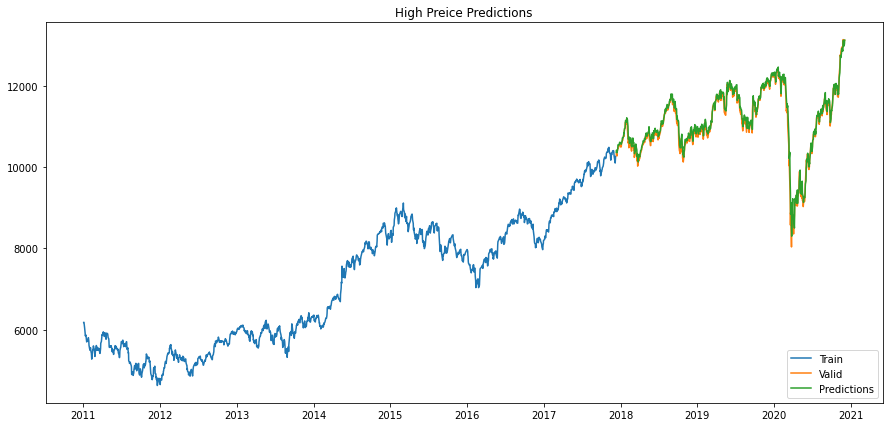

In [25]:
plt.figure(figsize = (15,7))
plt.title('High Preice Predictions')
plt.plot(train['High'])
plt.plot(valid[['High', 'Predictions']])
plt.legend(['Train','Valid', 'Predictions'], loc = 'lower right')
plt.show()

In [26]:
valid.head()

,High,Predictions
Date,,
2017-12-11,10329.20,10370.394531
2017-12-12,10326.10,10420.638672
2017-12-13,10296.55,10409.396484
2017-12-14,10276.10,10376.146484
2017-12-15,10373.10,10356.047852


In [27]:
valid.shape

(737, 2)

In [28]:
# For predicting one value

ts1 = ts.copy()
ts1 = ts1[:61]
# Get the last 60 days index and convert to array
last_60_days = ts1[-60:].values
# Scale the data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

# Convert the x_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Get the predicted scaled price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[5807.18]]


# Forecasting For All Data

In [32]:
# Creating input data for prediction
x_test1 = []
for i in range(60,len(scaled_data)):
    x_test1.append(scaled_data[i-60:i, 0])

In [33]:
# Get the last 60 days index and convert to array
X_test1 = np.array(x_test1)
   
#Reshape the data
X_test1 = np.reshape(X_test1,(X_test1.shape[0],X_test1.shape[1],1))
   
# Get the predicted scaled price
pred_price = model.predict(X_test1)
predicted_price = scaler.inverse_transform(pred_price)

In [34]:
len(predicted_price)

2397

## Plotting New Predicted Values

In [35]:
df_predicted = df.copy()
df_predicted = df_predicted.iloc[60:]
df_predicted['Predicted'] = predicted_price

In [36]:
df_predicted.set_index('Date', inplace = True)
df_predicted.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
df_predicted.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Predicted
Date,,,,,,,
2011-03-30,5755.80,5803.15,5753.90,5787.65,133208726,6161.99,5772.862305
2011-03-31,5803.05,5872.00,5778.65,5833.75,219441114,11741.25,5807.180176
2011-04-01,5835.00,5860.20,5810.40,5826.05,118321855,5698.58,5865.884277
2011-04-04,5842.00,5918.70,5833.20,5908.45,106392427,5424.67,5868.882324
2011-04-05,5923.85,5928.65,5855.85,5910.05,110625437,5386.96,5913.473145


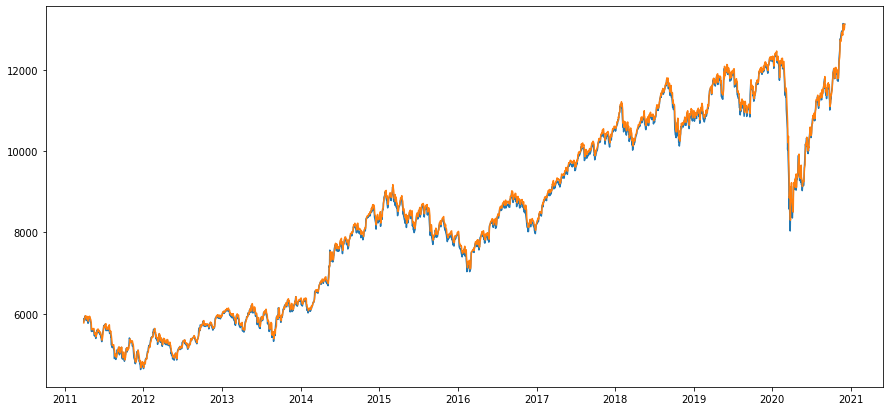

In [37]:
plt.figure(figsize = (15,7))
plt.plot(df_predicted['High'])
plt.plot(df_predicted['Predicted'])
plt.show()

In [76]:
# from google.colab import files
# df_predicted.to_csv('Nifty50 forecasted data.csv', encoding = 'utf-8')
# files.download('Nifty50 forecasted data.csv')